In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/financial-news/articles.csv
/kaggle/input/financial-news/links.csv


### Data

In [2]:
# Load the financial news dataset and do some basic transformations
import pandas as pd

df = pd.read_csv('/kaggle/input/financial-news/articles.csv')
df_links = pd.read_csv('/kaggle/input/financial-news/links.csv')
df = df.merge(df_links, left_on ='source_url', right_on= 'link')
# # Reduce the number of observations
# df.drop_duplicates(subset='text', inplace = True)
# # Draw random sample of 20%
# df = df.sample(frac=0.1, random_state = 42)
df['date'] = pd.to_datetime(df.date).dt.tz_localize("EST")
df['date_utc'] = df.date.dt.tz_convert("UTC")
df['year'] = df['date_utc'].dt.year
df['month'] = df['date_utc'].dt.month
df['release']= df['date'].dt.date
df.dropna(inplace = True)
df.rename(columns={'instrument':'ticker'}, inplace=True)
df = df[df['year'] >= 2016]

/opt/conda/lib/python3.7/site-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


#### Data Exploration

In [3]:
df.columns

Index(['date', 'headline', 'ticker', 'source_url', 'text', 'link', 'source',
       'date_utc', 'year', 'month', 'release'],
      dtype='object')

In [4]:
print('Number of unique articles: ' + str(len(df.text.unique())))

Number of unique articles: 162928


In [5]:
# get random article
import random
random.seed(5)

for i in random.sample(range(0, len(df)-1),1):
    print(df.text[i])
    print('___________________________________________________________________________________')

Investing.com – Japan stocks were higher after the close on Wednesday, as gains in the  Retail ,  Gas & Water  and  Transport  sectors led shares higher. At the close in Tokyo, the  Nikkei 225  gained 0.57%. The best performers of the session on the  Nikkei 225  were   JFE Holdings, Inc.   (T: 5411 ), which rose 5.88% or 144.0 points to trade at 2595.0 at the close. Meanwhile,   Yamaha Corp.   (T: 7951 ) added 5.16% or 200.0 points to end at 4075.0 and   Kobe Steel, Ltd.   (T: 5406 ) was up 4.25% or 43.0 points to 1055.5 in late trade. The worst performers of the session were   Tokyo Electron Ltd.   (T: 8035 ), which fell 5.77% or 1285.0 points to trade at 20995.0 at the close.   Dainippon Screen Mfg. Co., Ltd.   (T: 7735 ) declined 5.03% or 540.0 points to end at 10185.0 and   Shin-Etsu Chemical Co., Ltd.   (T: 4063 ) was down 3.82% or 475.0 points to 11945.0. Rising stocks outnumbered declining ones on the Tokyo Stock Exchange by 2214 to 1086 and 196 ended unchanged. Shares in JFE Ho

In [6]:
# check by ticker
df.ticker.value_counts()

US500       13537
DJI         10272
AAPL         8978
IXIC         8884
AMZN         8063
            ...  
033780          1
PNNI            1
ED4             1
TINCk           1
EVER_...        1
Name: ticker, Length: 16484, dtype: int64

In [7]:
# check by source
df.source.value_counts()

By Investing.com       589433
By Reuters             210042
By Seeking Alpha       108848
By Bloomberg            16648
By StockNews             6400
By Business Insider      1048
By Money Show             234
By FinanceMagnates         22
By Bloomberg_video          2
By Cointelegraph            1
Name: source, dtype: int64

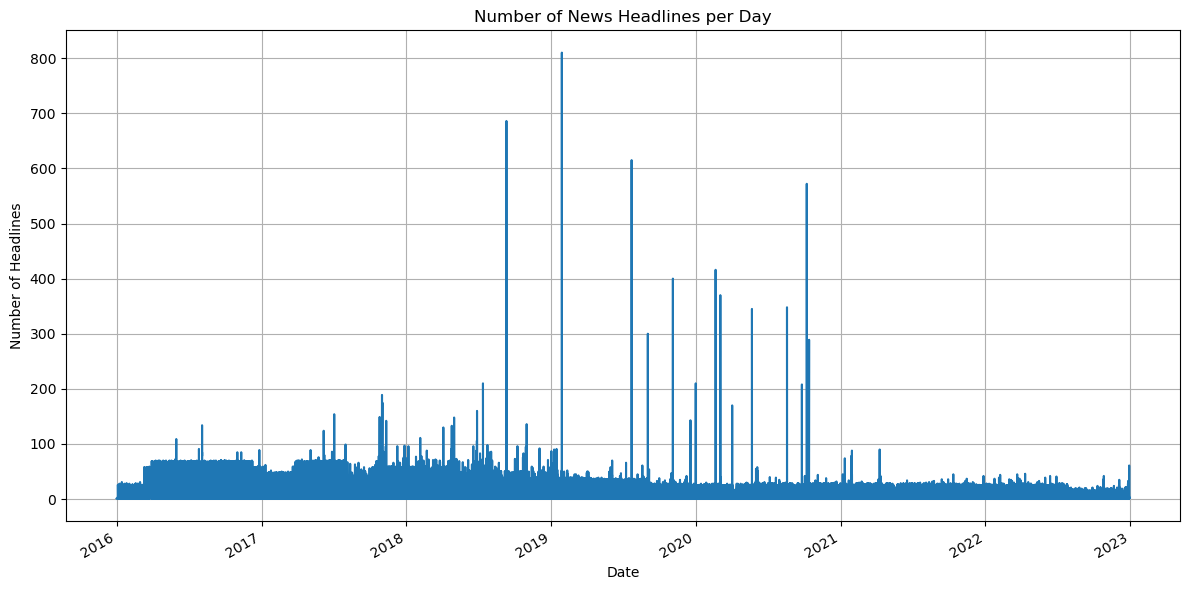

In [8]:
import matplotlib.pyplot as plt
df['release'] = pd.to_datetime(df['release'])
headlines_count = df.groupby('date').size()

plt.figure(figsize=(12,6))
headlines_count.plot()
plt.title('Number of News Headlines per Day')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# set ticker of interest
tickerSymbol = "US500"

In [10]:
# filter df for ticker
df = df[df['ticker']==tickerSymbol]

In [11]:
df.drop_duplicates(subset='text', keep='first', inplace=True)

In [12]:
# check by ticker
df.ticker.value_counts()

US500    13381
Name: ticker, dtype: int64

In [13]:
# check by year
df.year.value_counts()

2022    2539
2018    2306
2021    2141
2020    1989
2017    1755
2019    1595
2016    1056
Name: year, dtype: int64

In [14]:
display(min(df.release))
display(max(df.release))

Timestamp('2016-01-04 00:00:00')

Timestamp('2022-12-30 00:00:00')

In [15]:
df = df[['release','headline', 'text']]
# df.rename(columns={'release':'date'}, inplace=True)

In [16]:
df.to_csv('/kaggle/working/SP500_news.csv')

#### Financial Data

In [17]:
!pip install yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135720 sha256=19377aee2c6f9e27f8c2d4960cfbebc1ed2933f0db141fc3e13988a9d8b7981c
  Stored in directory: /root/.cache/pip/wheels/3d/94/75/04466de49ad673d7f0fc420ad799701870e63a3b833387d2f4
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

In [18]:
data = []
tickerSymbol = '^GSPC'
start = min(df['release'])
end = max(df['release'])
ticker = yf.Ticker(tickerSymbol)
fin_data = ticker.history(start=start, end = end)

In [19]:
fin_data = fin_data.reset_index()[['Date','Open', 'Close', 'High', 'Low', 'Volume']]

In [20]:
# Convert 'date' column to datetime type
fin_data['Date'] = pd.to_datetime(fin_data['Date'])

# Format 'date' column to 'YYYY-MM-DD'
fin_data['Date'] = fin_data['Date'].dt.strftime('%Y-%m-%d')
fin_data['Date'] = pd.to_datetime(fin_data['Date'])
fin_data.rename(columns={'Date':'date'}, inplace=True)

# Convert 'date' column to datetime type
df['release'] = pd.to_datetime(df['release'])

# Format 'date' column to 'YYYY-MM-DD'
df['release'] = df['release'].dt.strftime('%Y-%m-%d')
df['release'] = pd.to_datetime(df['release'])

In [21]:
fin_data.to_csv('/kaggle/working/SP500_stock.csv')

In [22]:
# Convertadd_suffix the trading days to a set for faster lookup
trading_days_set = set(fin_data['date'].dt.date)
max_trading_date = fin_data['date'].max().date()

def next_trading_day(x):
    # Convert the date to a python date object for compatibility with the set
    x_date = x.date()
    # Keep advancing a day until it's a trading day or exceeds the max trading date
    while x_date not in trading_days_set and x_date <= max_trading_date:
        x += pd.DateOffset(days=1)
        x_date = x.date()
    return pd.Timestamp(x_date) if x_date <= max_trading_date else pd.NaT  # Return NaT if date is out of bounds

df['date'] = df['release'].apply(next_trading_day)


In [23]:
df.dropna(inplace = True)

In [24]:
df

,release,headline,text,date
124,2022-12-29,Stock market today: Dow ends higher as dip-buy...,By Yasin Ebrahim Investing.com -- The Dow clos...,2022-12-29
140,2022-12-29,S&P 500 jumps as dip-buyers piled into tech,By Yasin Ebrahim Investing.com --The S&P 500 ...,2022-12-29
180,2022-12-29,Stock markets extend gains as an end-of-year r...,By Daniel Shvartsman Investing.com - U.S. mar...,2022-12-29
209,2022-12-29,Dow futures rise 80 pts ahead of weekly jobles...,By Peter Nurse Investing.com -- U.S. stocks ar...,2022-12-29
252,2022-12-28,"Equities fall on risk aversion with 2023, Chin...",By Sinéad Carew NEW YORK (Reuters) - Equity in...,2022-12-28
...,...,...,...,...
932588,2016-01-05,Wall Street lower as investors turn cautious; ...,By Abhiram Nandakumar (Reuters) - Apple dragge...,2016-01-05
932619,2016-01-05,Investing.com sentiment: speculators less bear...,Investing.com - The Investing.com weekly senti...,2016-01-05
932625,2016-01-05,Global share market settles after stormy start...,By Sujata Rao LONDON (Reuters) - World stocks ...,2016-01-05
932635,2016-01-05,Shares in Asia mixed with Shanghai recovering ...,Investing.com - Asian shares were mixed with S...,2016-01-05


In [25]:
df_input = fin_data.merge(df,on='date', how= 'outer')

In [26]:
df_input.groupby("date")["Close"].count()

date
2016-01-04     1
2016-01-05     5
2016-01-06     1
2016-01-07     3
2016-01-08     2
              ..
2022-12-22    11
2022-12-23     9
2022-12-27     4
2022-12-28     7
2022-12-29     4
Name: Close, Length: 1761, dtype: int64

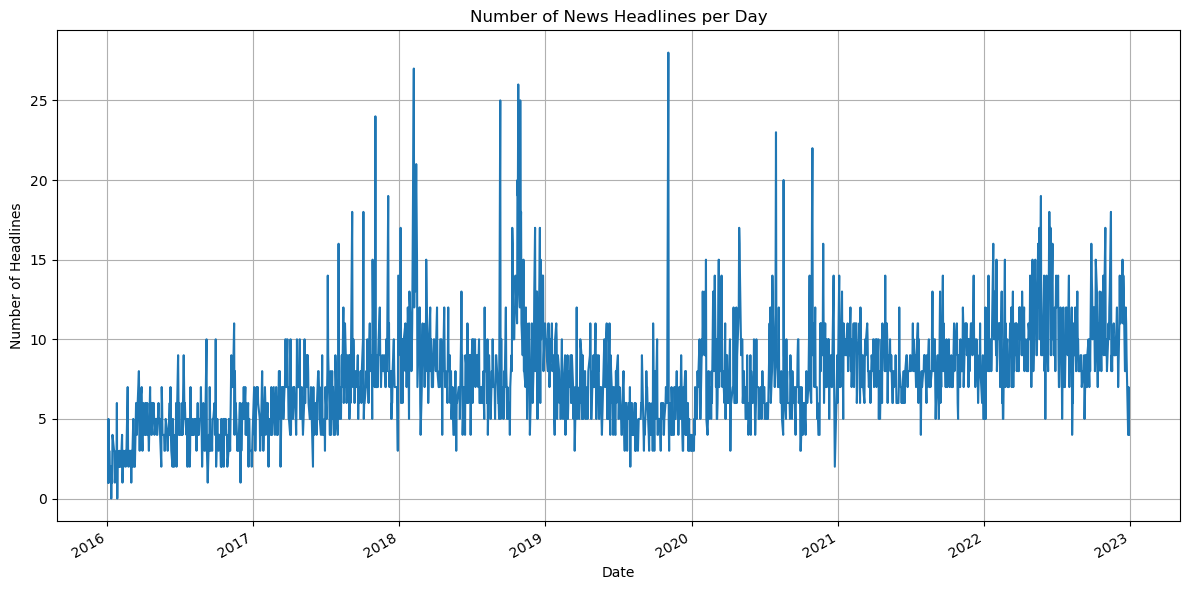

In [27]:
import matplotlib.pyplot as plt
df_input['date'] = pd.to_datetime(df_input['date'])
headline_counts = df_input.groupby("date")["headline"].count()

plt.figure(figsize=(12,6))
headline_counts.plot()
plt.title('Number of News Headlines per Day')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
df_input.to_csv('/kaggle/working/SP500_all.csv')